In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load the raw csv file
df = pd.read_csv("query.csv")
df.head(10)

,#group,false,false.1,true,true.1,false.2,false.3,true.2,true.3,true.4
0,#datatype,string,long,dateTime:RFC3339,dateTime:RFC3339,dateTime:RFC3339,double,string,string,string
1,#default,mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,result,table,_start,_stop,_time,_value,_field,_measurement,location
3,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T15:00:00Z,1174.553450722427,co2,environment,office
4,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T16:00:00Z,1201.6809658913132,co2,environment,office
5,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T17:00:00Z,1227.7438621450397,co2,environment,office
6,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T18:00:00Z,1126.605237057831,co2,environment,office
7,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T19:00:00Z,621.3720049284015,co2,environment,office
8,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T20:00:00Z,760.1739939748505,co2,environment,office
9,NaN,NaN,0,2024-02-06T17:28:43.746488846Z,2024-03-07T17:28:43.746488846Z,2024-02-27T21:00:00Z,742.2489517531766,co2,environment,office


In [31]:
# Skip the metadata
df = pd.read_csv("query.csv", skiprows=3)

# Convert the '_time' column to datetime format
df['_time'] = pd.to_datetime(df['_time'])

In [22]:
# Filter data for temperature, CO2, and humidity
temperature_df = df[df['_field'] == 'temperature'].copy()
co2_df = df[df['_field'] == 'co2'].copy()
humidity_df = df[df['_field'] == 'humidity'].copy()

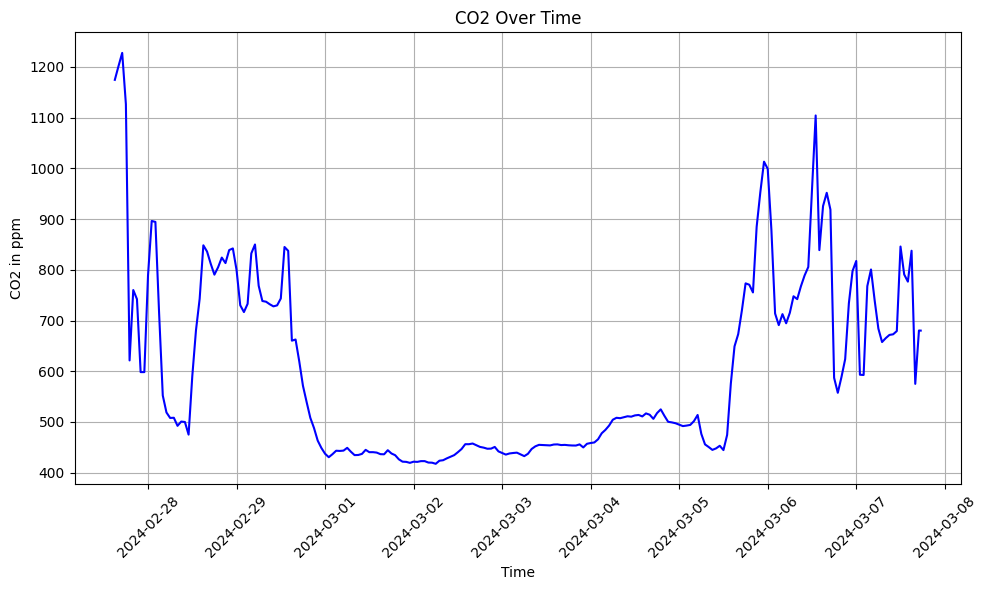

In [28]:
# Plot the C02 graph
plt.figure(figsize=(10, 6))
plt.plot(co2_df['_time'], co2_df['_value'],  linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('CO2 in ppm')
plt.title('CO2 Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

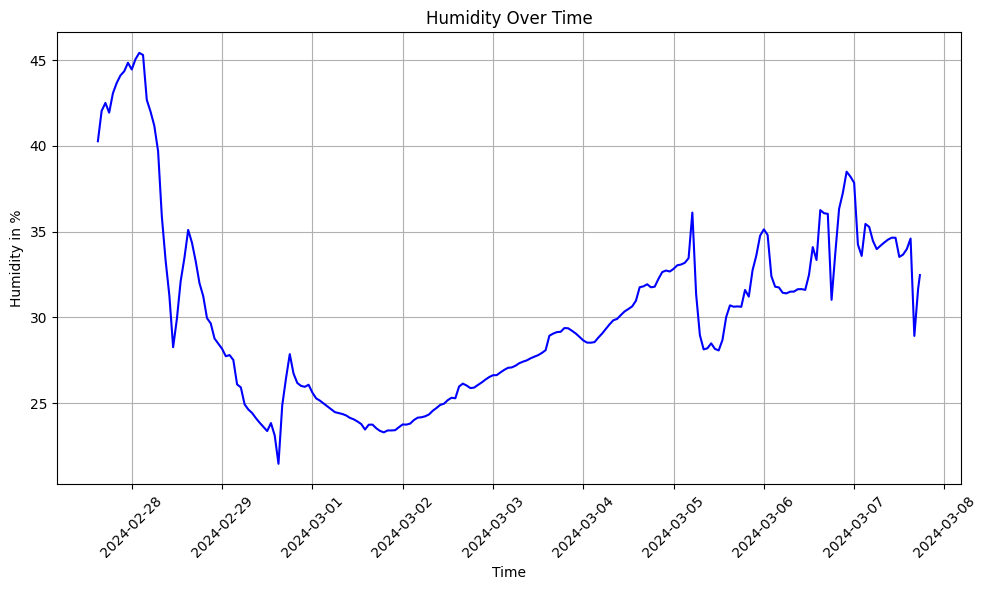

In [29]:
# Plot the Humidity graph
plt.figure(figsize=(10, 6))
plt.plot(humidity_df['_time'], humidity_df['_value'], linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Humidity in %')
plt.title('Humidity Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

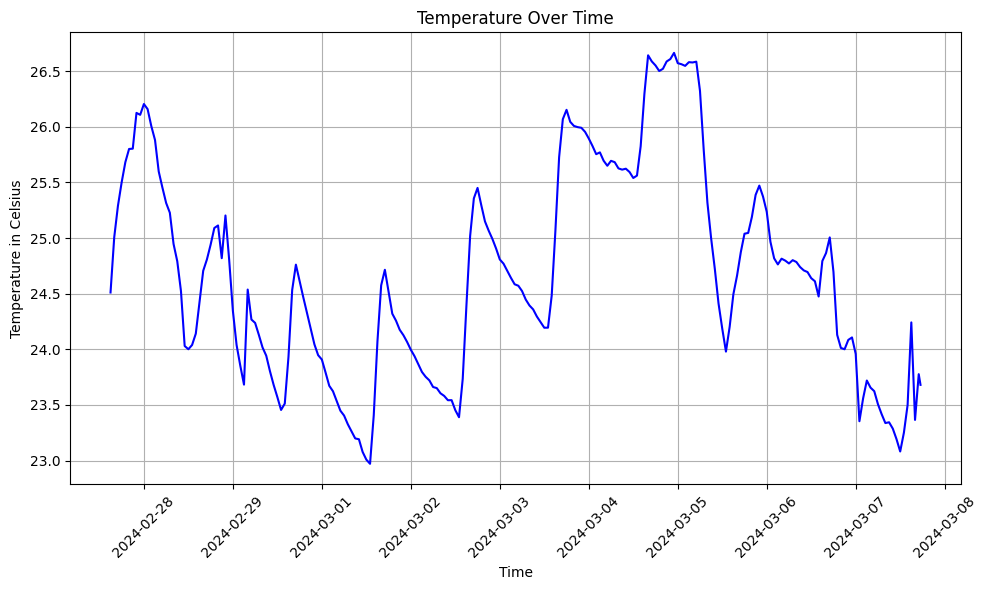

In [30]:
# Plot the Temperature graph (This seems to be off, => look into Calibration)
plt.figure(figsize=(10, 6))
plt.plot(temperature_df['_time'], temperature_df['_value'],  linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Temperature in Celsius')
plt.title('Temperature Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()